# Analítica de datos
# Examen parcial 1
# 2018-02
# NOMBRE APELLIDO, código

El dataset que deben analizar contiene los registros del histórico de las personas a las que se les ha otorgado un crédito financiero, indicando quienes pudieron pagarlo sin problemas y quienes no.

La idea es poder predecir, utilizando un modelo de aprendizaje supervisado (KNN) y las variables independientes disponibles qué aspirantes a un crédito tienen mas o menos riesgo de pagar.

Las variables de la hoja de datos son las siguientes:
- ID: El ID del cliente en el banco. Numérico, debe ser positivo y único.
- PudoPagar: Indica si el cliente ha podido pagar el crédito sin problemas (1) o no (0). Variable categórica binaria.
- Estudiante: Indica si el cliente es estudiante (Si) o no lo es (No). Variable categórica binaria.
- Ingresos: Indica la cantidad del crédito que aún adeuda el cliente. Deben ser valores numéricos positivos o nulos.
- Cuenta: Indica el dinero que tiene en la cuenta del banco. Deben ser valores numéricos.

## Entendimiento de los datos, limpieza

El archivo "creditos_examen.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

#### Puntos a desarrollar

- Carguen el archivo en memoria y exploren los datos, tratando de identificar problemas e inconsistencias teniendo en cuenta el diccionario de datos y el contexto del problema. (0.7)

- Obtengan el modelo de referencia (Baseline) y calculen sus métricas de evaluación. (0.3)

- Limpien los datos arreglando los problemas, eliminando columnas, eliminando registros, o ignorándolos, justificando sus decisiones. 
Una vez resueltos los problemas encontrados, indique la siguiente información: ID del registro, Tipo de ProblemaResolución. (1.2)

## Modelamiento con K-NN

#### Puntos a desarrollar:

- Escogiendo un valor de los parámetros al azar, construyan un modelo K-NN inicial sobre los datos limpios y calcule las métricas de accuracy, error, kappa, precision, recall, especifidad, y F-measure. Analice la calidad del modelo interpretando las métricas (1.0).

- Teniendo en cuenta las métricas más adecuadas para el problema, y siguiendo un protocolo de evaluación adecuado, establezca el mejor valor de los parámetros del modelo. (1.5)

- ¿El valor de los parámetros inicialmente escogido estaba en una situación de overfitting o de underfitting? Explique su respuesta. (0.5)

# Desarrollo de los puntos

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import KFold, cross_val_score #protocolo de evaluación
from sklearn import neighbors, datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

...

# EDA

In [75]:
df = pd.read_csv("creditos_examen.csv", sep=";")
df.head(25)

,ID,PudoPagar,Estudiante,Ingresos,Cuenta
0,-1,0,No,3196574,358943
1,-1,0,No,4944040,3857756
2,1,0,No,4436163,3647632
3,2,0,Si,1210613,4085902
4,3,0,No,3176714,5367746
5,4,0,No,3570449,2646253
6,5,0,No,3846350,3928279
7,6,0,Si,749156,4597943
8,7,0,No,2490523,4127567
9,8,0,Si,1760045,4043338


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
ID            10000 non-null int64
PudoPagar     10000 non-null int64
Estudiante    9996 non-null object
Ingresos      10000 non-null int64
Cuenta        10000 non-null int64
dtypes: int64(4), object(1)
memory usage: 390.7+ KB


In [77]:
df.describe()

,ID,PudoPagar,Ingresos,Cuenta
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.423000,0.033300,3.036625e+06,1.433952e+07
std,2887.023398,0.179428,7.028938e+07,1.016575e+09
min,-1.000000,0.000000,-4.288864e+09,-2.247063e+07
25%,2500.750000,0.000000,1.823537e+06,2.408656e+06
50%,5000.500000,0.000000,3.209805e+06,4.118185e+06
75%,7500.250000,0.000000,4.281578e+06,5.831542e+06
max,10000.000000,1.000000,4.299358e+09,1.016613e+11


In [78]:
df[df.ID < 0]

,ID,PudoPagar,Estudiante,Ingresos,Cuenta
0,-1,0,No,3196574,358943
1,-1,0,No,4944040,3857756


In [79]:
df = df[df.ID > 0]
df.head(10)

,ID,PudoPagar,Estudiante,Ingresos,Cuenta
2,1,0,No,4436163,3647632
3,2,0,Si,1210613,4085902
4,3,0,No,3176714,5367746
5,4,0,No,3570449,2646253
6,5,0,No,3846350,3928279
7,6,0,Si,749156,4597943
8,7,0,No,2490523,4127567
9,8,0,Si,1760045,4043338
10,9,0,No,3746853,5805289
11,10,0,No,2927527,0


In [80]:
type(df['ID'].unique())
len(df['ID'].unique())

9996

Aunque se puede eliminar la columna ID porque no es relevante para mi análisis

In [81]:
df = df.drop(['ID'], axis=1)
df.head()

,PudoPagar,Estudiante,Ingresos,Cuenta
2,0,No,4436163,3647632
3,0,Si,1210613,4085902
4,0,No,3176714,5367746
5,0,No,3570449,2646253
6,0,No,3846350,3928279


Cambiamos la variable objetivo a una variable categorica

In [82]:
df.PudoPagar = df.PudoPagar.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 2 to 9999
Data columns (total 4 columns):
PudoPagar     9998 non-null object
Estudiante    9994 non-null object
Ingresos      9998 non-null int64
Cuenta        9998 non-null int64
dtypes: int64(2), object(2)
memory usage: 390.5+ KB


## Limpieza: valores faltantes
### Estudiantes

In [83]:
# Obtenemos los na y los utilizamos indices para obtenerlos del dataframe
df[df.Estudiante.isna()]

,PudoPagar,Estudiante,Ingresos,Cuenta
759,0,NaN,2538070,1924989
779,0,NaN,4119537,5096245
799,0,NaN,3377683,50944
819,0,NaN,2721295,474662


In [84]:
df = df.dropna()

In [85]:
df.describe(include="all")

,PudoPagar,Estudiante,Ingresos,Cuenta
count,9994,9994,9.994000e+03,9.994000e+03
unique,2,2,NaN,NaN
top,0,No,NaN,NaN
freq,9661,7050,NaN,NaN
mean,NaN,NaN,3.036357e+06,1.434695e+07
std,NaN,NaN,7.031048e+07,1.016880e+09
min,NaN,NaN,-4.288864e+09,-2.247063e+07
25%,NaN,NaN,1.823249e+06,2.409333e+06
50%,NaN,NaN,3.209805e+06,4.119322e+06
75%,NaN,NaN,4.281768e+06,5.833152e+06


## Limpieza: valores negativos

In [86]:
df[df.Ingresos < 0].aggregate("count")

PudoPagar     999
Estudiante    999
Ingresos      999
Cuenta        999
dtype: int64

Analicemos los valores para tomar una decisión

In [87]:
df[df.Ingresos < 0]

,PudoPagar,Estudiante,Ingresos,Cuenta
1500,0,No,-6954195,632793
1501,0,No,-2424394,1936181
1502,1,Si,-1177023,11664391
1503,0,No,-2441113,6797192
1504,0,No,-5836039,2346659
1505,0,No,-4008669,556475
1506,0,No,-5435573,7219376
1507,0,No,-5156003,1984102
1508,0,Si,-1516049,730756
1509,0,No,-3661583,3036000


Hay un error sistematico en la captura de los datos. Estimo que se ingresaron con el signo al revés, entonces puedo volverlos positivos.

In [88]:
df.Ingresos = df.Ingresos.abs()

In [89]:
df.describe(include='all')

,PudoPagar,Estudiante,Ingresos,Cuenta
count,9994,9994,9.994000e+03,9.994000e+03
unique,2,2,NaN,NaN
top,0,No,NaN,NaN
freq,9661,7050,NaN,NaN
mean,NaN,NaN,4.563288e+06,1.434695e+07
std,NaN,NaN,7.022790e+07,1.016880e+09
min,NaN,NaN,7.719700e+04,-2.247063e+07
25%,NaN,NaN,2.133270e+06,2.409333e+06
50%,NaN,NaN,3.455722e+06,4.119322e+06
75%,NaN,NaN,4.381718e+06,5.833152e+06


## Limpieza: verificar datos atípicos
### Hago un box-plot

#### INGRESOS

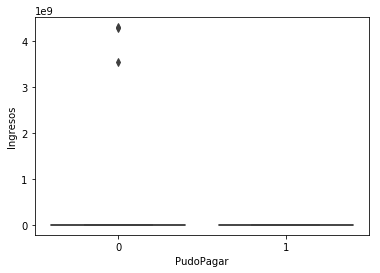

In [90]:
sns.boxplot(data=df, x="PudoPagar", y="Ingresos")

In [91]:
df[df.Ingresos > 1e+07]

,PudoPagar,Estudiante,Ingresos,Cuenta
2399,0,No,4288864105,7669586
2499,0,No,4299357653,7981139
2598,0,No,3533318222,2532130


In [92]:
df = df[df.Ingresos < 1e+07]

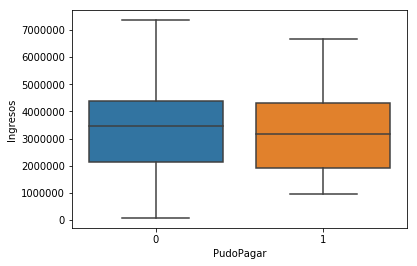

In [93]:
sns.boxplot(data=df, x="PudoPagar", y="Ingresos")

### CUENTA

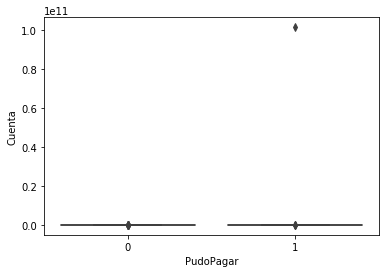

In [94]:
sns.boxplot(data=df, x="PudoPagar", y="Cuenta")

# Baseline

Si es clasificación defino el baseline como la categoría mayoritaria